In [145]:
from google.colab import drive
import os

# Dataset link: https://www.kaggle.com/datasets/msambare/fer2013

# adjust dataset directory direction in colab before executing
drive.mount('/content/drive/')
data_directory = '/content/drive/My Drive/Colab Notebooks/SML/Article/fer2013_2/'

train_directory = os.path.join(data_directory, "train")
test_directory = os.path.join(data_directory, "test")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [146]:
import os
import shutil


def directory(DATASET, VALIDATION_PART, data_directories):

    train_directory = os.path.join(data_directories, "train")
    test_directory = os.path.join(data_directories, "test")
    validation_directory = os.path.join(data_directories, "validation")
    expressions_list = os.listdir(train_directory)

    #     For the first run it is necessary to create the validation folder and
    # move the validation image portion to this new folder. This way it will be
    # guaranteed that validation set has the same balance as training set.
    #     If the validation directory already exist (from old executions). It
    # will be neccesary to move back all files and delete the folders to be able
    # to run the code.
    #    This is what the code bellow does.
    exist = os.path.exists(validation_directory)
    if exist:
        for folder in os.listdir(validation_directory):
            directory_validation_emotion = os.path.join(validation_directory, folder)
            directory_train_emotion = os.path.join(train_directory, folder)
            _, _, files = next(os.walk(directory_validation_emotion))
            file_count = len(files)
            i = 0
            while i < file_count:
                image_validation = os.path.join(str(directory_validation_emotion),
                                                str(os.listdir(directory_validation_emotion)[0]))
                image_train = os.path.join(str(directory_train_emotion), str(os.listdir(directory_validation_emotion)[0]))
                os.rename(image_validation, image_train)
                i += 1
            shutil.rmtree(directory_validation_emotion)
        shutil.rmtree(validation_directory)

    os.mkdir(validation_directory)

    for folder in os.listdir(train_directory):
        directory_train_emotion = os.path.join(train_directory, folder)
        directory_validation_emotion = os.path.join(validation_directory, folder)
        os.mkdir(directory_validation_emotion)
        validation_size = len(os.listdir(directory_train_emotion)) * VALIDATION_PART
        print(f"Moving validation files from {folder}'s train folder to {folder}'s validation folder...")

        i = 0
        while i <= validation_size:
            image_train = os.path.join(str(directory_train_emotion), str(os.listdir(directory_train_emotion)[0]))
            image_validation = os.path.join(str(directory_validation_emotion),
                                            str(os.listdir(directory_train_emotion)[0]))
            os.rename(image_train, image_validation)
            i += 1

    return [data_directories, train_directory, test_directory, validation_directory, expressions_list]


In [147]:
import tensorflow as tf


def data_preparation(train_directory, validation_directory, test_directory, BATCH_SIZE):

    # Processing of training input data and validation separately to
    # ensure a good distribution of examples for each class.
    train_data = tf.keras.preprocessing.image_dataset_from_directory(
        train_directory,
        image_size=(48, 48),
        batch_size=BATCH_SIZE,
        seed=42,
        color_mode="grayscale"
    )

    validation_data = tf.keras.preprocessing.image_dataset_from_directory(
        validation_directory,
        image_size=(48, 48),
        batch_size=BATCH_SIZE,
        seed=42,
        color_mode="grayscale"
    )

    test_data = tf.keras.preprocessing.image_dataset_from_directory(
        test_directory,
        image_size=(48, 48),
        batch_size=BATCH_SIZE,
        seed=42,
        color_mode="grayscale"
    )

    # Normalization (divide the value of each pixel by 255, transforming the range from 0 - 255 to 0 - 1).
    train_data = train_data.map(lambda x, y: (x/255., y))
    validation_data = validation_data.map(lambda x, y: (x/255., y))
    test_data = test_data.map(lambda x, y: (x/255., y))

    return train_data, validation_data, test_data


In [148]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization, Dropout



def VGG_small_compile(DROPOUT, optimizer, loss, metrics):

    model = Sequential()

    # First convolutional layer (with 2 Convolutions [with different number of filters],
    # 1 max polling, batch normalization and dropout)
    model.add(Conv2D(filters=32,kernel_size=(3, 3),strides=1,activation="relu",padding="same",input_shape=(48, 48, 1)))
    model.add(Conv2D(filters=64,kernel_size=(3, 3),strides=1,activation="relu",padding="same",input_shape=(48, 48, 1)))
    # model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
    # model.add(Dropout(float(DROPOUT)))

    # Second convolutional layer (same components, changing only the number of filters)
    model.add(Conv2D(filters=128,kernel_size=(3, 3),strides=1,activation="relu",padding="same",input_shape=(48, 48, 1)))
    model.add(Conv2D(filters=256,kernel_size=(3, 3),strides=1,activation="relu",padding="same",input_shape=(48, 48, 1)))
    # model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
    # model.add(Dropout(float(DROPOUT)))

    # Dense layer, with 2 hidden layers with 512 neurons each, batch normalization and dropout
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    # model.add(BatchNormalization())
    # model.add(Dropout(float(DROPOUT)))
    model.add(Dense(512, activation="relu"))
    # model.add(BatchNormalization())
    # model.add(Dropout(float(DROPOUT)))
    model.add(Dense(7, activation="softmax"))
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    return model


In [149]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization, Dropout



def VGG_small_2_compile(DROPOUT, optimizer, loss, metrics):

    model = Sequential()

    # First convolutional layer (with 2 Convolutions [with different number of filters],
    # 1 max polling, batch normalization and dropout)
    model.add(Conv2D(filters=32,kernel_size=(3, 3),strides=1,activation="relu",padding="same",input_shape=(48, 48, 1)))
    model.add(Conv2D(filters=64,kernel_size=(3, 3),strides=1,activation="relu",padding="same",input_shape=(48, 48, 1)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
    model.add(Dropout(float(DROPOUT)))

    # Second convolutional layer (same components, changing only the number of filters)
    model.add(Conv2D(filters=128,kernel_size=(3, 3),strides=1,activation="relu",padding="same",input_shape=(48, 48, 1)))
    model.add(Conv2D(filters=256,kernel_size=(3, 3),strides=1,activation="relu",padding="same",input_shape=(48, 48, 1)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
    model.add(Dropout(float(DROPOUT)))

    # Dense layer, with 2 hidden layers with 512 neurons each, batch normalization and dropout
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(float(DROPOUT)))
    model.add(Dense(512, activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(float(DROPOUT)))
    model.add(Dense(7, activation="softmax"))
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    return model


In [150]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization, Dropout
from keras.applications.vgg16 import VGG16


def VGG16_compile(optimizer, loss, metrics):

    vgg16_model = VGG16(include_top=False, input_shape=(48, 48, 1), weights=None)

    model = tf.keras.Sequential()
    model.add(vgg16_model)
    model.add(Flatten())
    model.add(Dense(4096, activation="relu"))
    model.add(Dense(4096, activation="relu"))
    model.add(Dense(7, activation="softmax"))
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    return model


In [151]:
from tensorflow.keras import callbacks


def callback(EARLY_STOP, EPOCHS, PATIENCE):
    if EARLY_STOP is False:
        PATIENCE = EPOCHS

    training_callback = callbacks.EarlyStopping(
        monitor="val_loss",
        min_delta=0,
        patience=PATIENCE,  # Number of epochs with no improvement after which training will be stopped
        mode="auto",
        baseline=None,
        restore_best_weights=True,
    )

    return training_callback


In [152]:
def train_model(model, train_data, EPOCHS, validation_data, training_callback):
    model_trained = model.fit(
        train_data,
        epochs=EPOCHS,
        validation_data=validation_data,
        callbacks=training_callback,
        verbose=1)

    return model_trained


In [153]:
import os
from datetime import datetime


def create_data_directory(data_directory, EPOCHS, PATIENCE, DATASET, EARLY_STOP, BATCH_SIZE, LEARNING_RATE, VALIDATION_PART, MODEL_SELECTION, DROPOUT):
    timestamp = datetime.now().timestamp()
    date_time = datetime.fromtimestamp(timestamp)

    save_data_folder = os.path.join(
        data_directory,
        f'history//{MODEL_SELECTION}_{EPOCHS}_{PATIENCE}_{DATASET}_{EARLY_STOP}_{BATCH_SIZE}_{LEARNING_RATE}_{VALIDATION_PART}_{date_time.strftime("%d-%m-%Y-%H-%M-%S")}_{DROPOUT}'
    )

    os.makedirs(save_data_folder)

    return save_data_folder


In [154]:
import openpyxl
import pandas as pd


def training_metrics(model_trained, save_data_directory, total_time):
    file_directory = f"{save_data_directory}//train-validation_metrics.xlsx"

    model_trained = model_trained.history
    history_df = pd.DataFrame(model_trained)
    history_df.to_excel(file_directory, index=False)

    metrics_file = openpyxl.load_workbook(file_directory)
    sheet = metrics_file.get_sheet_by_name('Sheet1')
    sheet['F1'] = 'Training Time'
    sheet['F2'] = f'{total_time:.4f}'
    metrics_file.save(file_directory)


In [155]:
import matplotlib.pyplot as plt


def accuracy_graph(model_trained, save_data_directory):
    tittle_font = {"weight": "bold", "size": 20}
    axis_font = {"weight": "bold", "size": 14}
    legend_font = {"size": 14}

    fig = plt.figure(figsize=(25, 8))

    # Plot accuracy history
    plt.plot(model_trained.history['accuracy'])
    plt.plot(model_trained.history['val_accuracy'])
    plt.title(f"Accuracy vs Epoch", fontdict=tittle_font)
    plt.ylabel('Accuracy', fontdict=axis_font)
    plt.xlabel('Epoch', fontdict=axis_font)
    plt.legend(['Train', 'Validation'], loc='lower right', prop=legend_font)
    plt.xticks(range(len(model_trained.history["accuracy"])))
    plt.grid()
    plt.savefig(f'{save_data_directory}//accuracy.png', dpi=fig.dpi)


In [156]:
import matplotlib.pyplot as plt


def loss_graph(model_trained, save_data_directory):
    tittle_font = {"weight": "bold", "size": 20}
    axis_font = {"weight": "bold", "size": 14}
    legend_font = {"size": 14}

    fig = plt.figure(figsize=(25, 8))

    # Plot loss history
    plt.plot(model_trained.history['loss'])
    plt.plot(model_trained.history['val_loss'])
    plt.title(f"Loss vs Epoch", fontdict=tittle_font)
    plt.ylabel('Loss', fontdict=axis_font)
    plt.xlabel('Epoch', fontdict=axis_font)
    plt.legend(['Train', 'Validation'], loc='upper right', prop=legend_font)
    plt.xticks(range(len(model_trained.history["loss"])))
    plt.grid()
    plt.savefig(f'{save_data_directory}//loss.png', dpi=fig.dpi)


In [157]:
import os
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras.utils import plot_model, to_categorical
import seaborn as sns
from keras.metrics.accuracy_metrics import CategoricalAccuracy


def testing_metrics_batch_by_batch(model, test_data, expressions_list, save_data_directory):
    num_classes = len(expressions_list)
    num_batch = len(test_data)
    conf_matrix = np.zeros((num_classes, num_classes))
    accuracy = CategoricalAccuracy()

    batch_precision = 0
    batch_sensibility = 0
    batch_f1 = 0

    for batch in test_data.as_numpy_iterator():

        # Collect X and Y from each batch
        x_test, y_test = batch

        # Convert the target labels to one-hot encoding
        y_test = to_categorical(y_test, num_classes=num_classes)

        # Use the learned model to predict labels from test dataset
        y_test_pred = model.predict(x_test, verbose=0)

        # Calculating testing metrics (precision, recall and f1 score)
        precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_test_pred, axis=1),
                                    average='macro', zero_division=0)
        sensibility = recall_score(np.argmax(y_test, axis=1), np.argmax(y_test_pred, axis=1),
                                   average='macro', zero_division=0)
        f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_test_pred, axis=1),
                      average='macro', zero_division=0)

        batch_precision += precision
        batch_sensibility += sensibility
        batch_f1 += f1

        # Update batch by batch accuracy and categorical accuracy data
        accuracy.update_state(y_test, y_test_pred)

        # Computing confusion matrix data from each batch
        batch_confusion_matrix = confusion_matrix(
            np.argmax(y_test, axis=1),
            np.argmax(y_test_pred, axis=1),
            labels=range(num_classes)
        )

        conf_matrix += batch_confusion_matrix

    macro_precision = batch_precision / num_batch
    macro_sensibility = batch_sensibility / num_batch
    macro_f1 = batch_f1 / num_batch

    # Plotting confusion matrix
    fig, ax = plt.subplots(figsize=(10, 8))

    sns.heatmap(conf_matrix.astype(int), annot=True, fmt="d", cmap="Blues")

    ax.set_xlabel("Predicted Labels", fontdict={"weight": "bold", "size": 12})
    ax.set_ylabel("True Labels", fontdict={"weight": "bold", "size": 12})
    ax.set_title("Confusion Matrix", fontdict={"weight": "bold", "size": 18})

    ax.xaxis.set_ticklabels(expressions_list)
    ax.yaxis.set_ticklabels(expressions_list)

    plt.xticks(rotation=45)

    os.mkdir(f'{save_data_directory}//testing_batch_by_batch')
    batch_by_batch_folder = copy.copy(save_data_directory)
    batch_by_batch_folder = f'{batch_by_batch_folder}//testing_batch_by_batch'
    plt.savefig(f'{batch_by_batch_folder}//confusion-matrix.png', dpi=fig.dpi)

    # Plotting percentage confusion matrix

    # Normalizing confusion matrix to show percentage
    normalized_confusion_matrix = conf_matrix * 100 / conf_matrix.sum(axis=1, keepdims=True)
    fig2, ax2 = plt.subplots(figsize=(10, 8))

    sns.heatmap(normalized_confusion_matrix, annot=True, fmt=".2f", cmap='Greens')

    ax2.set_xlabel("Predicted Labels", fontdict={"weight": "bold", "size": 12})
    ax2.set_ylabel("True Labels", fontdict={"weight": "bold", "size": 12})
    ax2.set_title("Confusion Matrix", fontdict={"weight": "bold", "size": 18})

    ax2.xaxis.set_ticklabels(expressions_list)
    ax2.yaxis.set_ticklabels(expressions_list)

    plt.xticks(rotation=45)

    plt.savefig(f'{batch_by_batch_folder}//confusion-matrix_percentage.png', dpi=fig.dpi)

    categorical_testing_metrics = pd.DataFrame(
        [f'{(accuracy.result() * 100):.4f}',
        f'{macro_precision:.4f}',
        f'{macro_sensibility:.4f}',
        f'{macro_f1:.4f}',],
        index=['Accuracy', 'Precision', 'Recall', 'F1 Score']
    )

    file_directory = f"{batch_by_batch_folder}//testing_metrics.xlsx"

    categorical_testing_metrics.to_excel(file_directory, index=True, header=False)


In [158]:
import time
import tensorflow as tf


def model_execution(MODEL_SELECTION, EPOCHS, PATIENCE, DATASET, EARLY_STOP, BATCH_SIZE, LEARNING_RATE, VALIDATION_PART, data_directories, DROPOUT):
    print('Reading directories...')
    data_directory, train_directory, test_directory, validation_directory, expressions_list = directory(DATASET, VALIDATION_PART, data_directories)

    print('\nTransforming images into features and labels...\n')
    train_data, validation_data, test_data = data_preparation(train_directory, validation_directory, test_directory, BATCH_SIZE)

    print('Compiling model...')
    if MODEL_SELECTION == 'VGG_small_comdropout':
        model = VGG_small_2_compile(
            DROPOUT,
            loss="sparse_categorical_crossentropy",
            # optimizer=tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE),
            optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
            metrics=["accuracy"]

        )
    elif MODEL_SELECTION == 'VGG_small_semdropout':
        model = VGG_small_compile(
            DROPOUT,
            loss="sparse_categorical_crossentropy",
            # optimizer=tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE),
            optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
            metrics=["accuracy"]

        )
    elif MODEL_SELECTION == 'VGG16':
        model = VGG16_compile(
            loss="sparse_categorical_crossentropy",
            # optimizer=tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE),
            optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
            metrics=["accuracy"]
        )

    print('\nDefining training callbacks...')
    training_callback = callback(EARLY_STOP, EPOCHS, PATIENCE)

    print('Training model...\n')
    start_time = time.time()
    model_trained = train_model(
        model,
        train_data=train_data,
        EPOCHS=EPOCHS,
        validation_data=validation_data,
        training_callback=training_callback
    )
    total_time = time.time() - start_time

    print('\nCreating directory to save log data...')
    save_data_directory = create_data_directory(data_directory, EPOCHS, PATIENCE, DATASET, EARLY_STOP, BATCH_SIZE, LEARNING_RATE, VALIDATION_PART, MODEL_SELECTION, DROPOUT)

    print('Saving train and validation log data...')
    training_metrics(model_trained, save_data_directory, total_time)

    print('Saving accuracy graph...')
    accuracy_graph(model_trained, save_data_directory)

    print('Saving loss graph...')
    loss_graph(model_trained, save_data_directory)

    print('Generating testing metrics (batch by batch method)...')
    testing_metrics_batch_by_batch(model, test_data, expressions_list, save_data_directory)



Reading directories...
Moving validation files from angry's train folder to angry's validation folder...
Moving validation files from disgust's train folder to disgust's validation folder...
Moving validation files from fear's train folder to fear's validation folder...
Moving validation files from happy's train folder to happy's validation folder...
Moving validation files from neutral's train folder to neutral's validation folder...
Moving validation files from sad's train folder to sad's validation folder...
Moving validation files from surprise's train folder to surprise's validation folder...

Transforming images into features and labels...

Found 7 files belonging to 7 classes.
Found 7 files belonging to 7 classes.
Found 7 files belonging to 7 classes.
Compiling model...

Defining training callbacks...
Training model...

Epoch 1/3


1/1 [==============================] - ETA: 0s - loss: 1.9460 - accuracy: 0.1429

1/1 [==============================] - 4s 4s/step - loss: 1.9460 - accuracy: 0.1429 - val_loss: 1.9506 - val_accuracy: 0.1429
Epoch 2/3
1/1 [==============================] - 2s 2s/step - loss: 1.9506 - accuracy: 0.1429 - val_loss: 1.9463 - val_accuracy: 0.1429
Epoch 3/3
1/1 [==============================] - 1s 1s/step - loss: 1.9463 - accuracy: 0.1429 - val_loss: 1.9463 - val_accuracy: 0.1429

Creating directory to save log data...
Saving train and validation log data...
Saving accuracy graph...


<ipython-input-154-d97735d96b1a>:13: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  sheet = metrics_file.get_sheet_by_name('Sheet1')


Saving loss graph...
Generating testing metrics (batch by batch method)...
Reading directories...
Moving validation files from angry's train folder to angry's validation folder...
Moving validation files from disgust's train folder to disgust's validation folder...
Moving validation files from fear's train folder to fear's validation folder...
Moving validation files from happy's train folder to happy's validation folder...
Moving validation files from neutral's train folder to neutral's validation folder...
Moving validation files from sad's train folder to sad's validation folder...
Moving validation files from surprise's train folder to surprise's validation folder...

Transforming images into features and labels...

Found 7 files belonging to 7 classes.
Found 7 files belonging to 7 classes.
Found 7 files belonging to 7 classes.
Compiling model...

Defining training callbacks...
Training model...

Epoch 1/3


1/1 [==============================] - ETA: 0s - loss: 3.2179 - accuracy: 0.0000e+00

1/1 [==============================] - 7s 7s/step - loss: 3.2179 - accuracy: 0.0000e+00 - val_loss: 1.9461 - val_accuracy: 0.1429
Epoch 2/3
1/1 [==============================] - 5s 5s/step - loss: 2.9695 - accuracy: 0.2857 - val_loss: 1.9460 - val_accuracy: 0.1429
Epoch 3/3
1/1 [==============================] - 3s 3s/step - loss: 2.7727 - accuracy: 0.1429 - val_loss: 1.9460 - val_accuracy: 0.1429

Creating directory to save log data...
Saving train and validation log data...
Saving accuracy graph...


<ipython-input-154-d97735d96b1a>:13: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  sheet = metrics_file.get_sheet_by_name('Sheet1')


Saving loss graph...
Generating testing metrics (batch by batch method)...
Reading directories...
Moving validation files from angry's train folder to angry's validation folder...
Moving validation files from disgust's train folder to disgust's validation folder...
Moving validation files from fear's train folder to fear's validation folder...
Moving validation files from happy's train folder to happy's validation folder...
Moving validation files from neutral's train folder to neutral's validation folder...
Moving validation files from sad's train folder to sad's validation folder...
Moving validation files from surprise's train folder to surprise's validation folder...

Transforming images into features and labels...

Found 7 files belonging to 7 classes.
Found 7 files belonging to 7 classes.
Found 7 files belonging to 7 classes.
Compiling model...

Defining training callbacks...
Training model...

Epoch 1/3
1/1 [==============================] - 8s 8s/step - loss: 1.9459 - accuracy:

<ipython-input-154-d97735d96b1a>:13: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  sheet = metrics_file.get_sheet_by_name('Sheet1')


Saving loss graph...
Generating testing metrics (batch by batch method)...


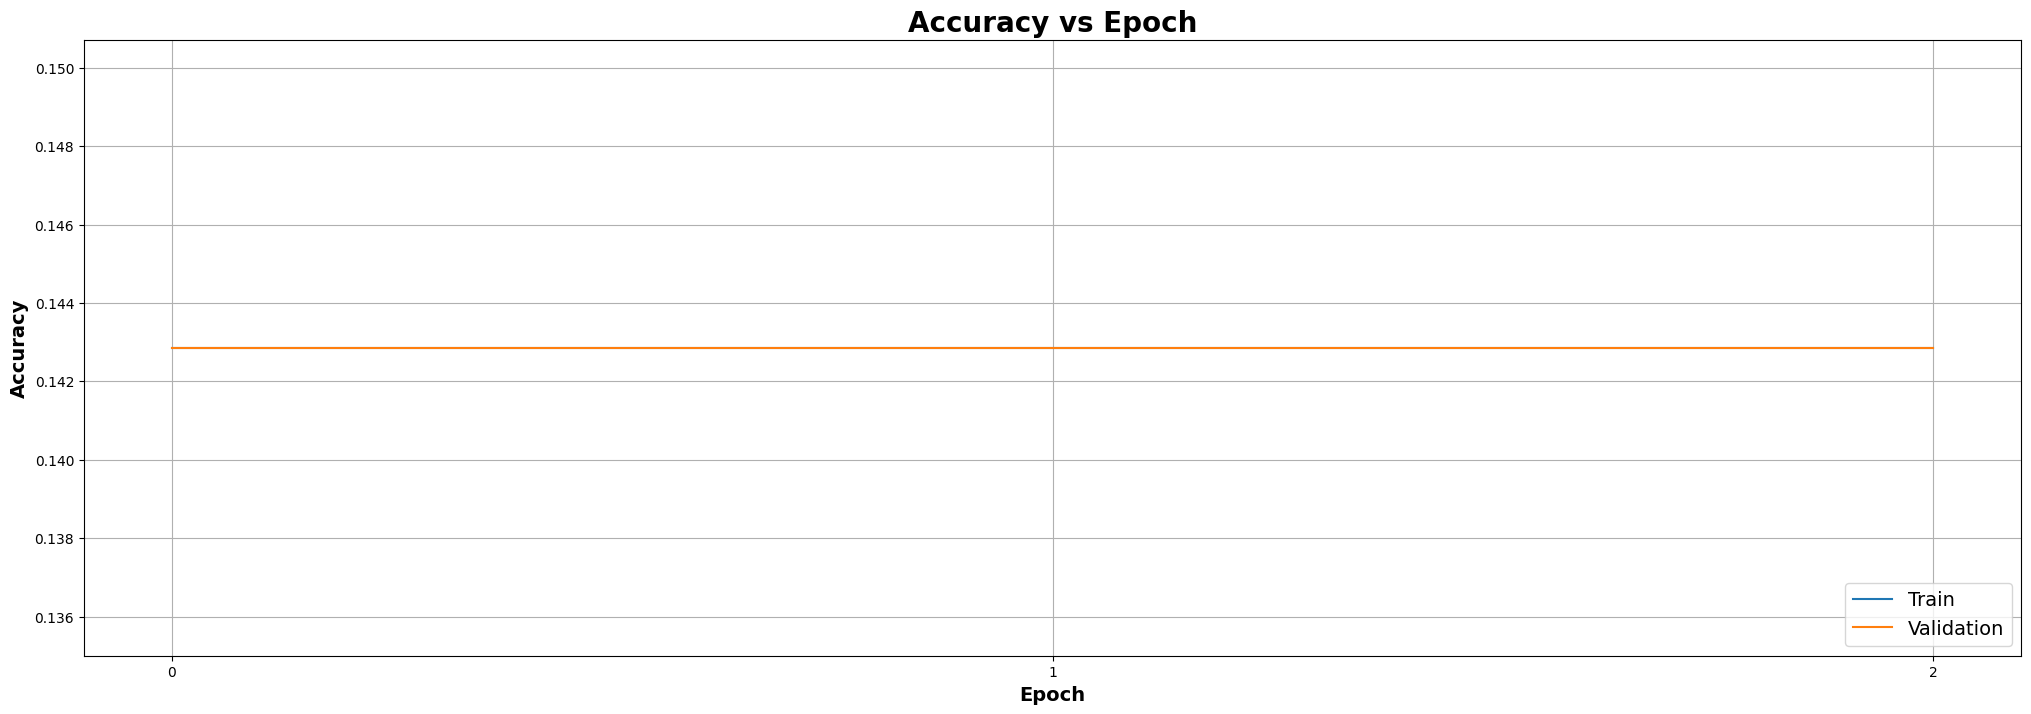

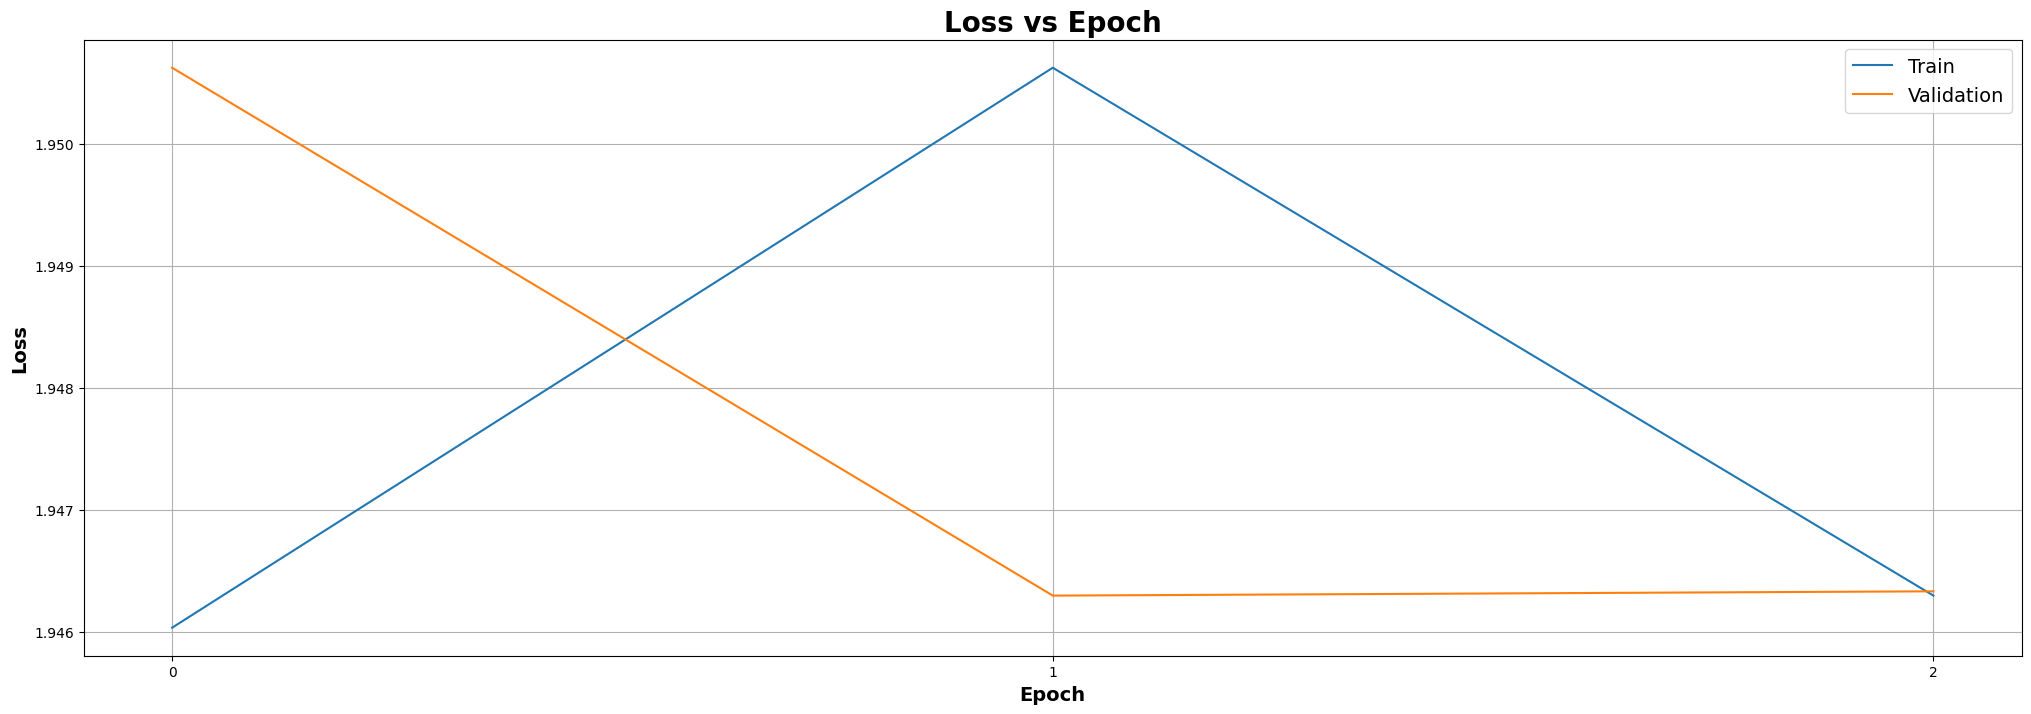

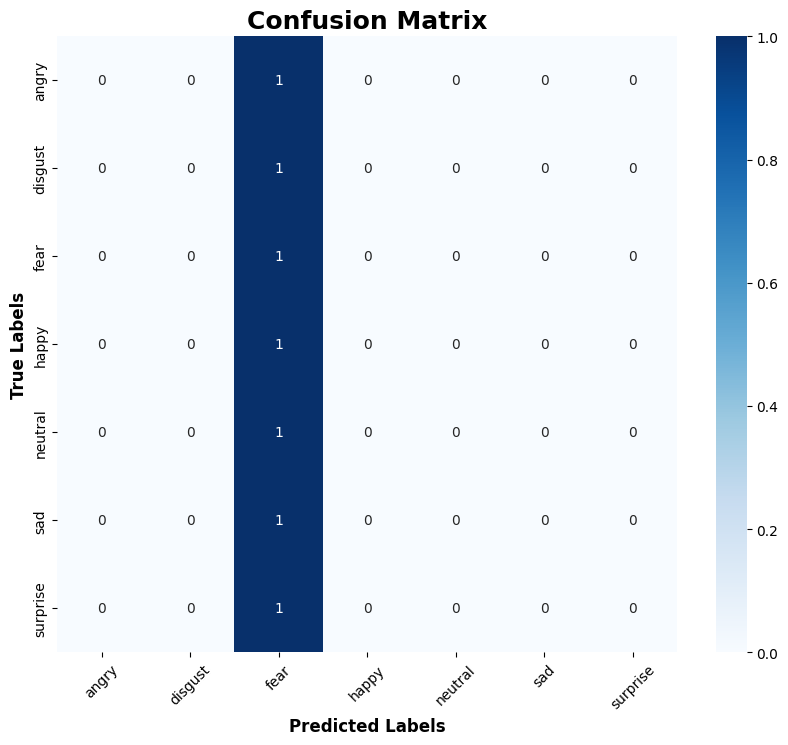

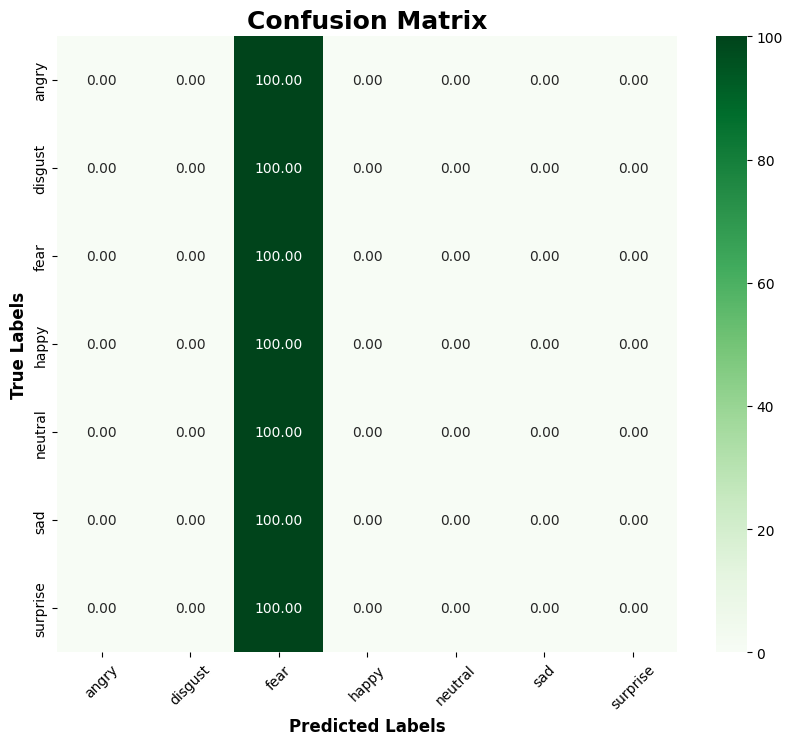

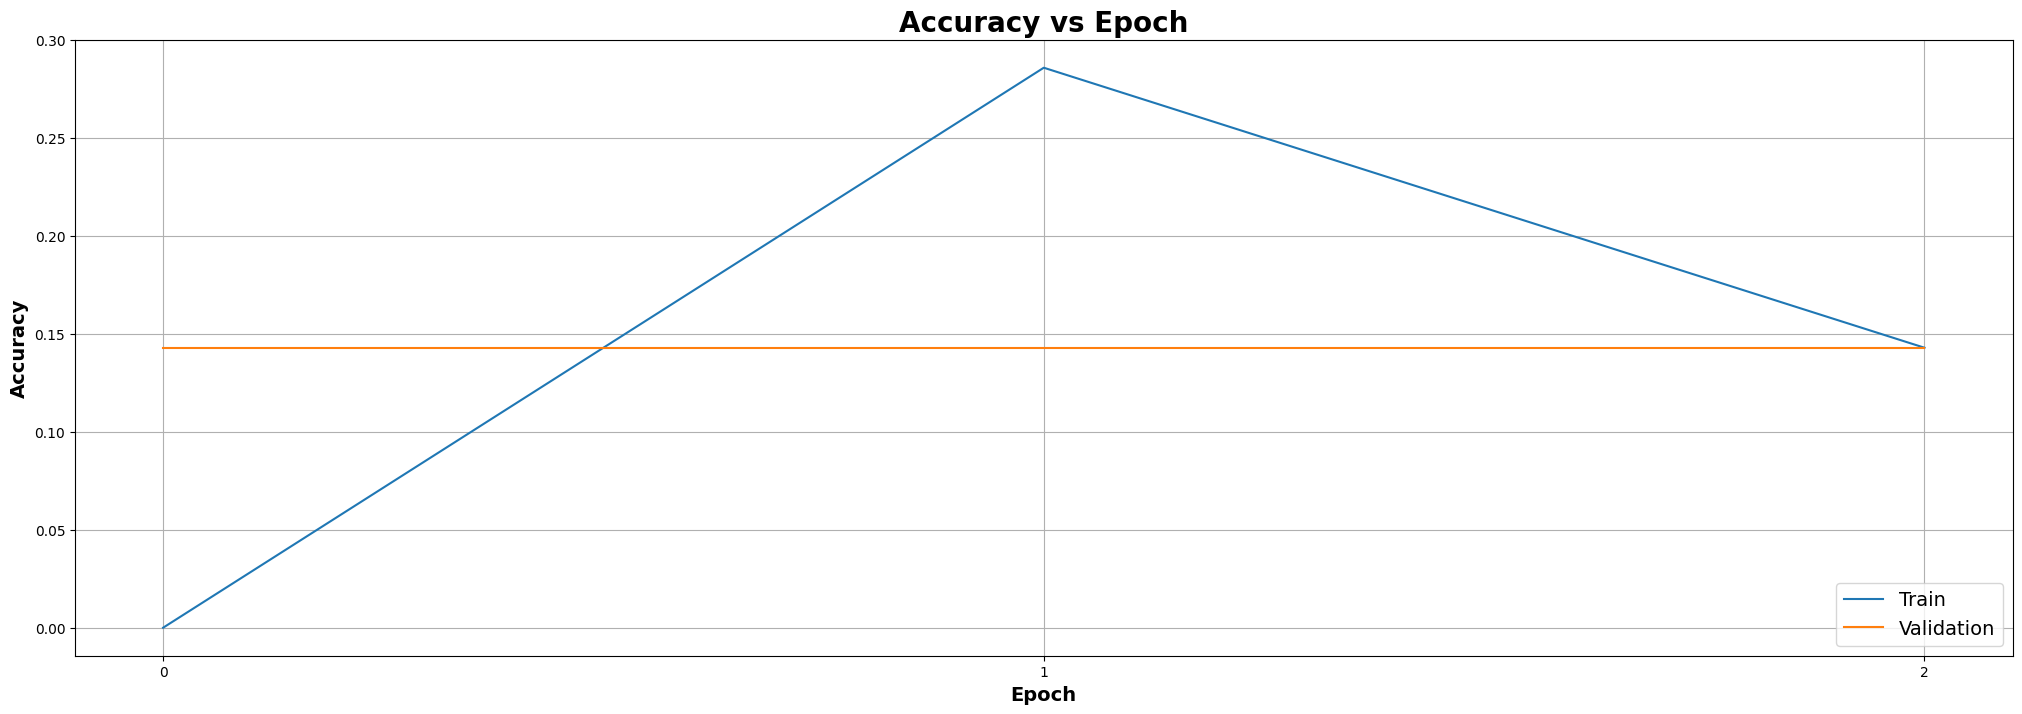

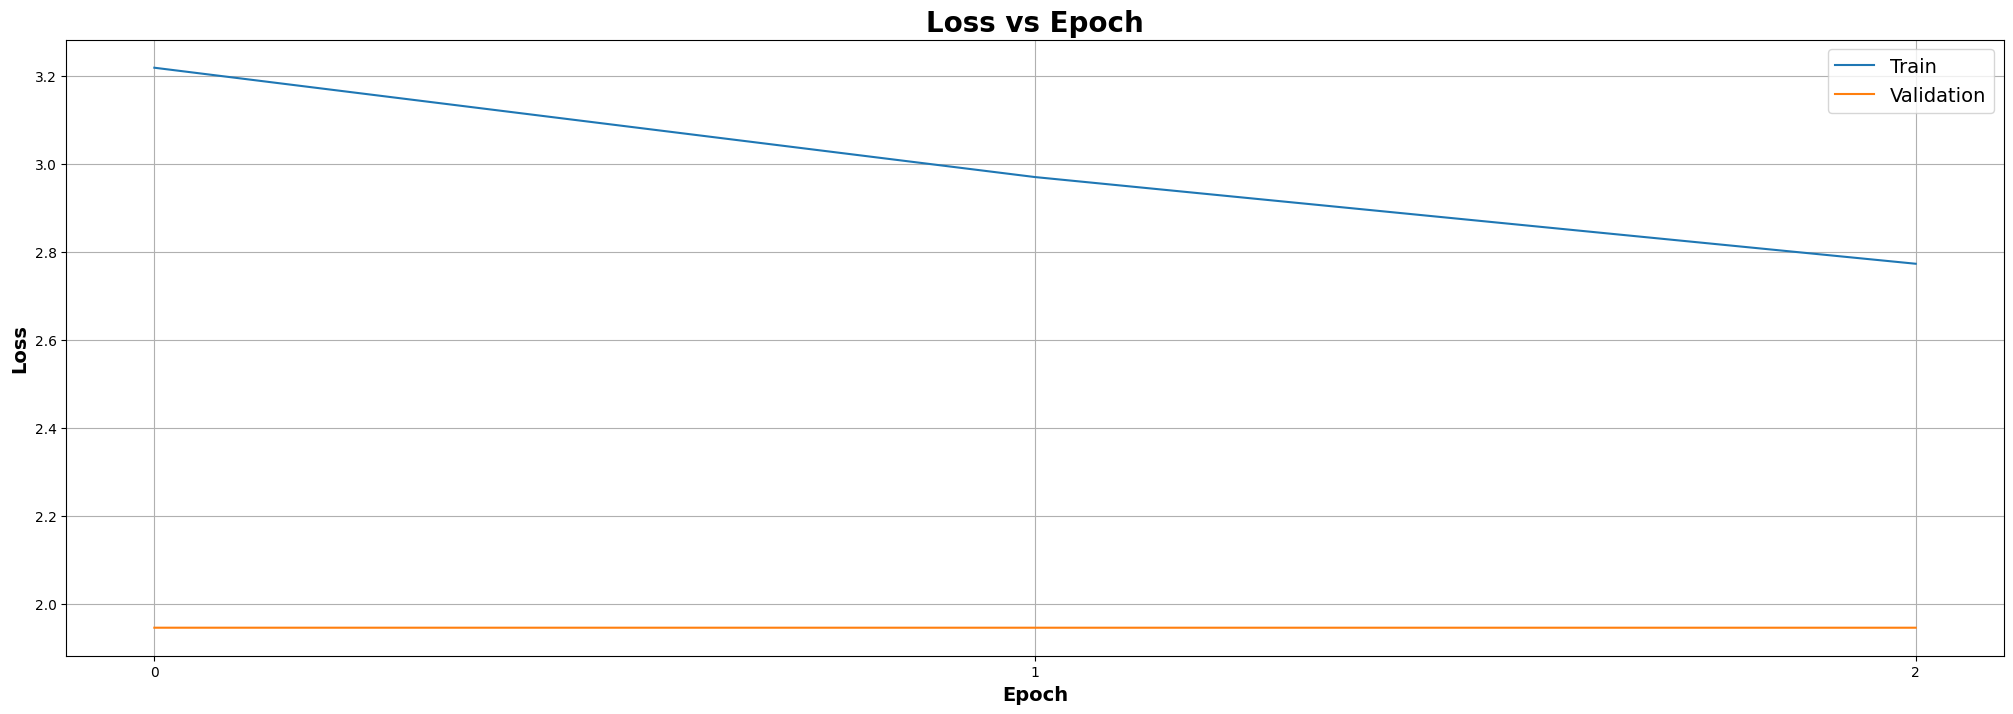

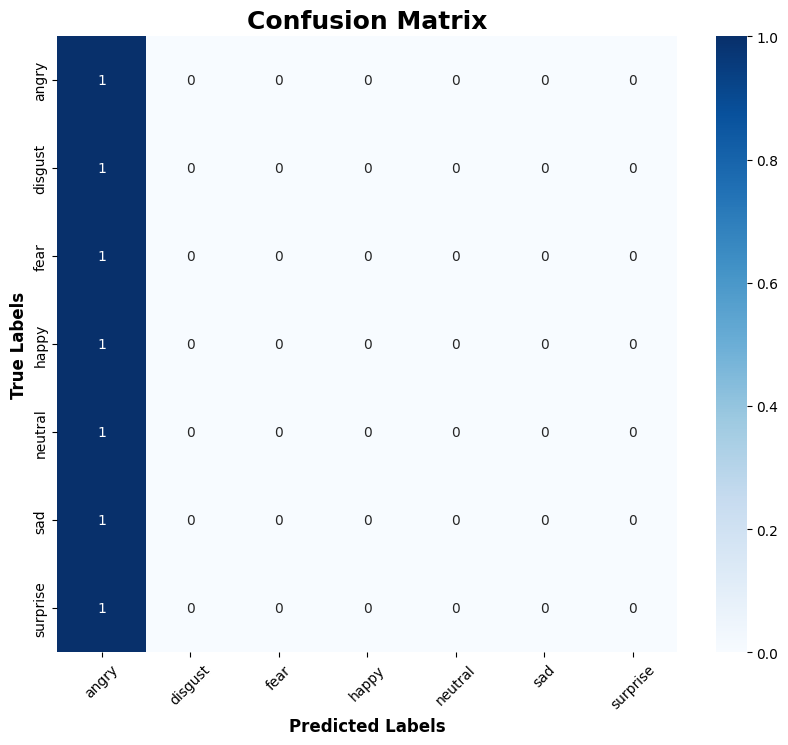

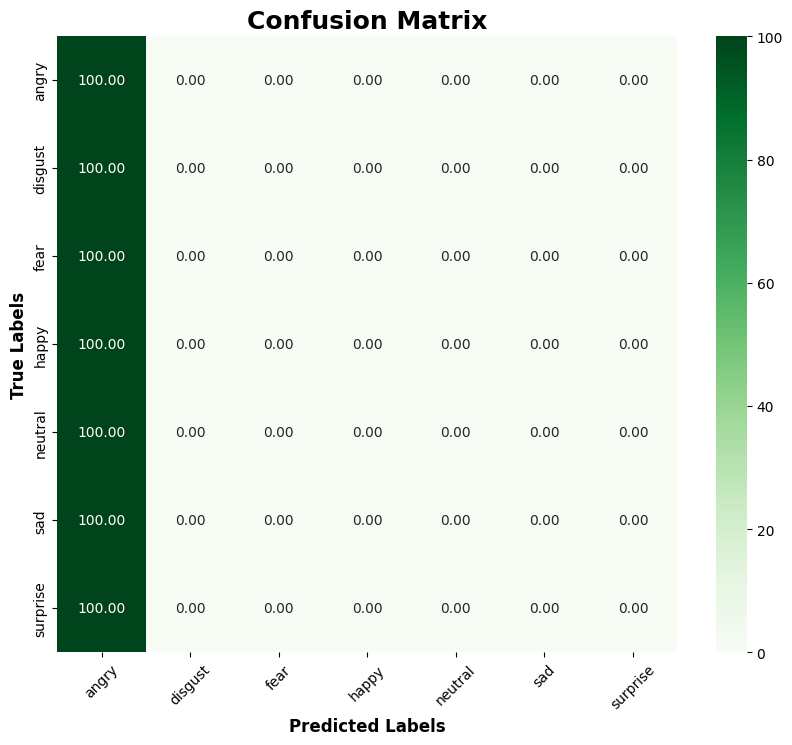

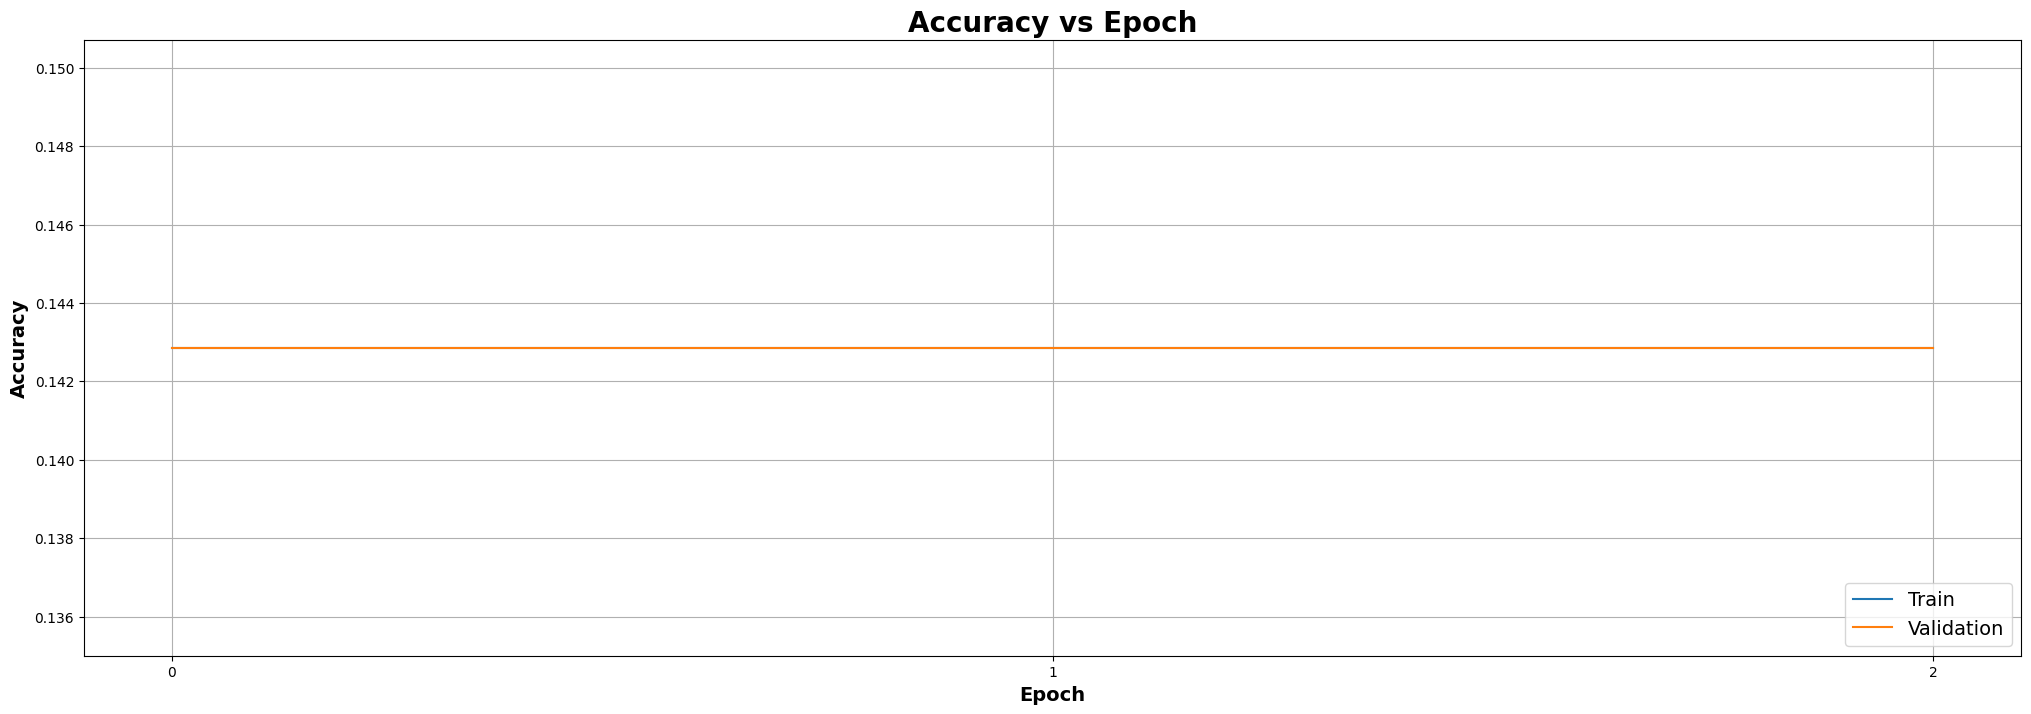

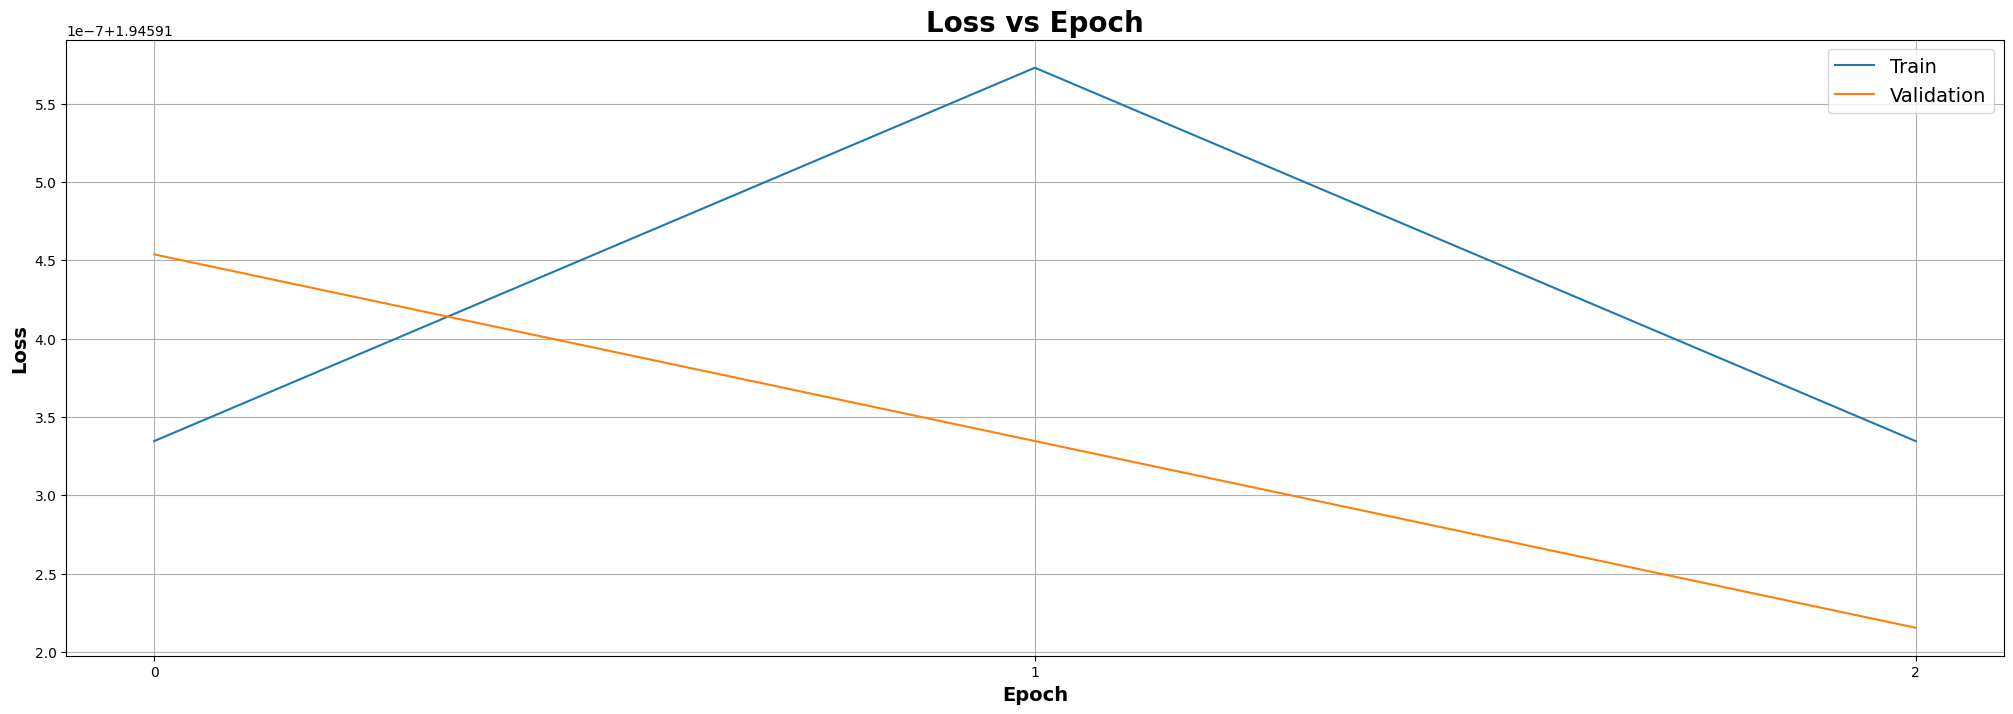

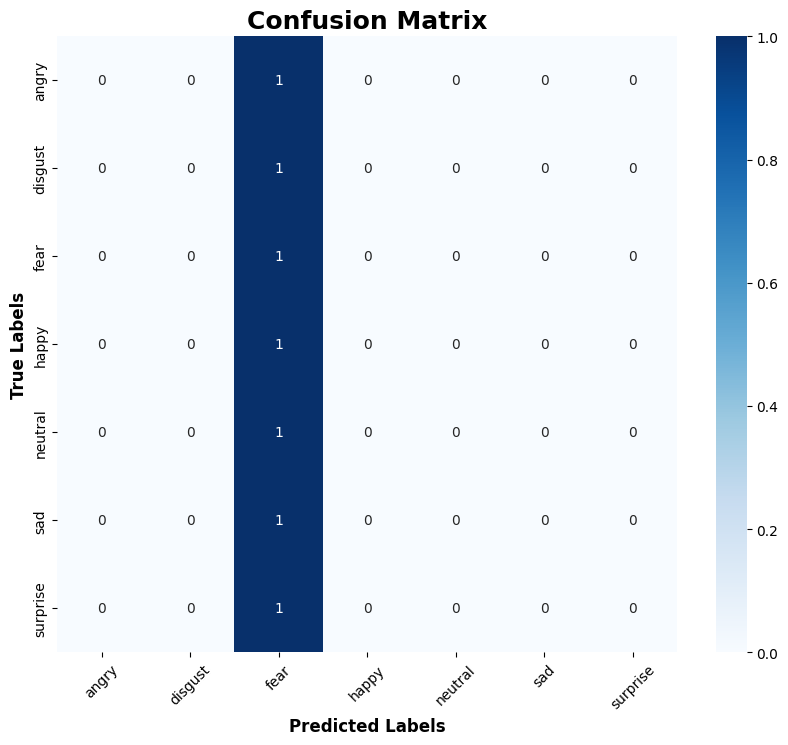

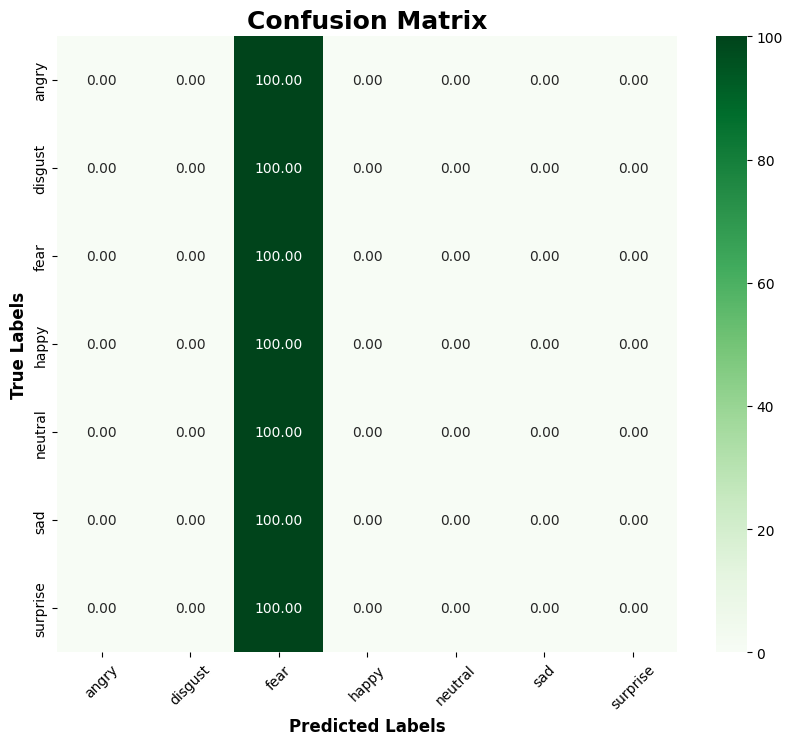

In [159]:
data_directories = "/content/drive/My Drive/Colab Notebooks/SML/Article/fer2013_2/"


####################################################################################################################################
# IMPORTANT: NOTICE THAT ALL DATA WILL BE SAVED INTO THE FOLLOWING DRIVE DIRECTORY: "DIRECTORY_WHERE_YOU_PLACED_THE_DATASET/history"
####################################################################################################################################

# The selection of model to use on training will be done by the string in the first parameter of function 'model_execution', as the examples below.

# Simplified model without dropout
model_execution('VGG_small_semdropout', 3, 30, 'train', False, 64, 0.0001, 0.25, data_directories, '0.3')

# Simplified model with dropout
model_execution('VGG_small_comdropout', 3, 30, 'train', False, 64, 0.0001, 0.25, data_directories, '0.3')

# VGG16
model_execution('VGG16', 3, 30, 'train', False, 64, 0.0001, 0.25, data_directories, '0.3')